<a href="https://colab.research.google.com/github/bidishaaiml/COE_week9/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection Using Machine Learning**

### **Importing the libraries**

In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Loading the Dataset**

In [2]:
#loading the dataset
df=pd.read_csv('/content/train (3).csv')
test=pd.read_csv('/content/test (1).csv')

### **Peek at the data**

In [3]:
#to display the first 10 rows of the data
df.head(10)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
5,1425010073,27,False,27.713638
6,1425010373,37,False,41.545710
7,1425010673,36,False,38.743620
8,1425010973,49,False,40.859787
9,1425011273,36,False,25.444733


In [4]:
test.head(10)

,timestamp,value,predicted
0,1396332000,20.0,20.0
1,1396332300,20.0,20.0
2,1396332600,20.0,20.0
3,1396332900,20.0,20.0
4,1396333200,20.0,20.0
5,1396333500,20.0,20.0
6,1396333800,20.0,20.0
7,1396334100,20.0,20.0
8,1396334400,20.0,20.0
9,1396334700,20.0,20.0


### **Information about the data**

In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


Inference: There are 4 columns and 15830 rows and has columns of data types float, integer and boolean.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3960 non-null   int64  
 1   value      3960 non-null   float64
 2   predicted  3960 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 92.9 KB


### **Statistical Summary**

In [7]:
#descriptive statistics about the data
df.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [8]:
test.describe()

,timestamp,value,predicted
count,3.960000e+03,3960.000000,3960.000000
mean,1.396926e+09,42.909050,43.841335
std,3.429894e+05,28.040740,28.315249
min,1.396332e+09,20.000000,3.158210
25%,1.396629e+09,20.000000,20.037745
50%,1.396926e+09,20.480000,22.011872
75%,1.397223e+09,79.904000,79.077084
max,1.397520e+09,79.999969,114.857970


In [9]:
#sorting the dataframe based on timestamp
df.sort_values('timestamp').head()
test.sort_values('timestamp').head()

,timestamp,value,predicted
0,1396332000,20.0,20.0
1,1396332300,20.0,20.0
2,1396332600,20.0,20.0
3,1396332900,20.0,20.0
4,1396333200,20.0,20.0


### **Checking for missing values**

In [10]:
#checking for null values
df.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [11]:
test.isnull().sum()

timestamp    0
value        0
predicted    0
dtype: int64

Inference: There are no null/missing values in the dataset

### **Checking for duplicated values**

In [12]:
#duplicated value
df.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

Inference: There are no duplicate values in the dataset.

## **Data Visualization**

### **Finding Correlation**

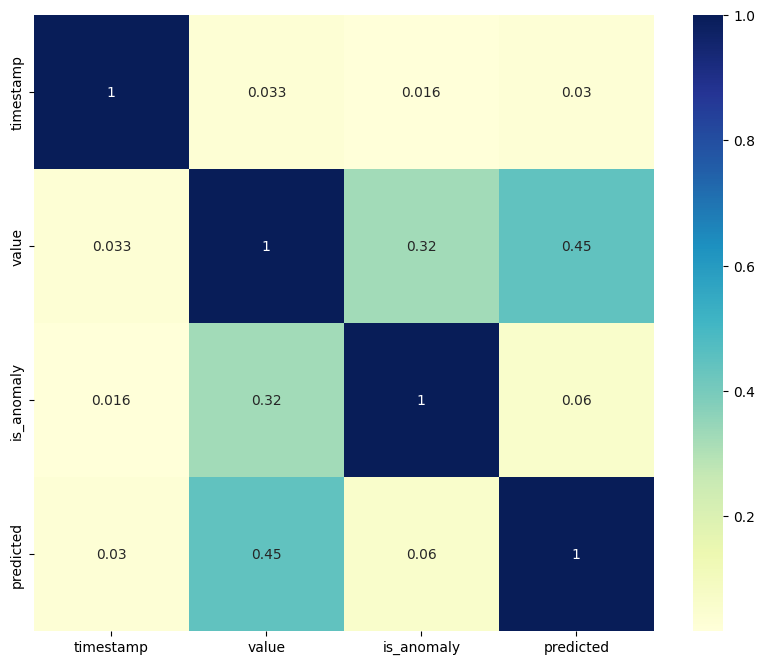

In [14]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

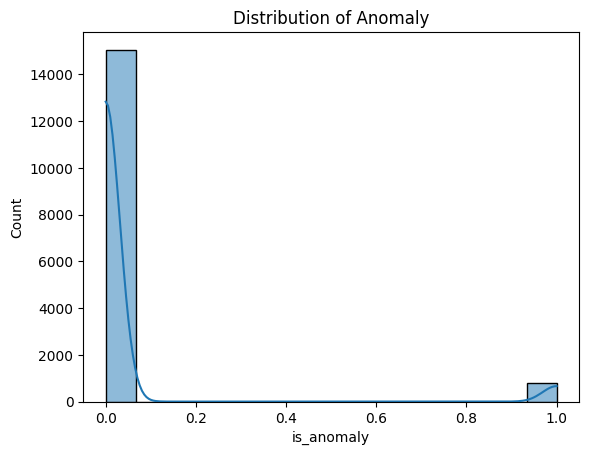

In [15]:
# Visualizing the distribution of the target variable
sns.histplot(df['is_anomaly'], kde=True)
plt.title('Distribution of Anomaly')
plt.show()

<Axes: xlabel='predicted', ylabel='value'>

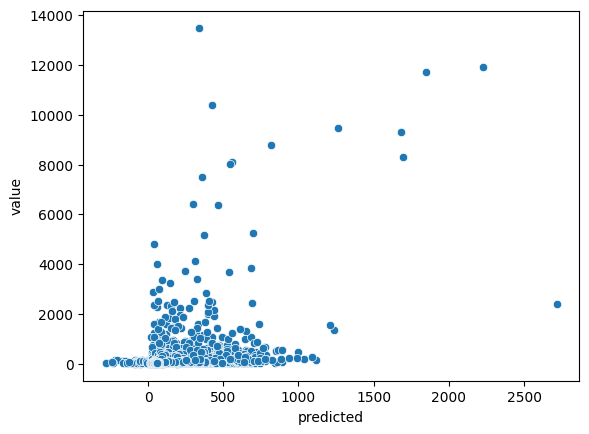

In [16]:
sns.scatterplot(x=df['predicted'], y=df['value'])

In [17]:
df['is_anomaly'].value_counts()

is_anomaly
False    15054
True       776
Name: count, dtype: int64

<ipython-input-18-68a3a1af6d1c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_anomaly',data=df, palette='Set2')


<Axes: xlabel='is_anomaly', ylabel='count'>

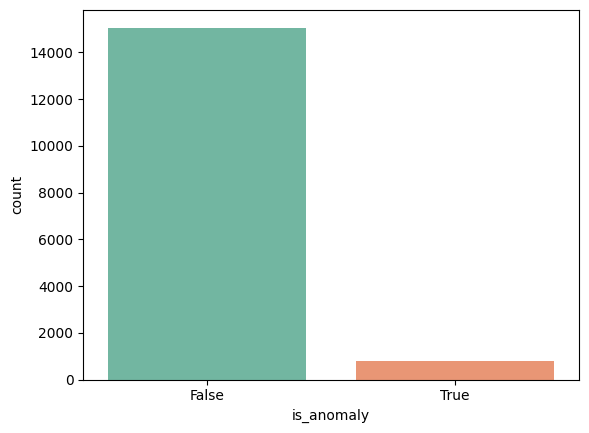

In [18]:
sns.countplot(x='is_anomaly',data=df, palette='Set2')

In [19]:
df.corr()['is_anomaly'].sort_values(ascending=False)

is_anomaly    1.000000
value         0.324859
predicted     0.059719
timestamp     0.016457
Name: is_anomaly, dtype: float64

In [20]:
# printing the anomolies
anomoly_df=df[df['is_anomaly']==True]
anomoly_df.head()

,timestamp,value,is_anomaly,predicted
22,1425015173,73,True,31.362171
25,1425016073,140,True,65.324310
83,1425033473,32,True,13.747632
93,1425036473,41,True,14.762168
123,1425045473,222,True,38.035175


In [21]:
#the ratio of non-anomalous instances to anomalous instances.
df['is_anomaly'].value_counts()[0]/df['is_anomaly'].value_counts()[1]

19.399484536082475

In [22]:
# Calculating the percentage of True and False values in the 'is_anomaly' column
value_counts = df['is_anomaly'].value_counts()
percentage_true = (value_counts[True] / len(df)) * 100
percentage_false = (value_counts[False] / len(df)) * 100

# Printing the percentages
print(f"Percentage of True (Anomaly): {percentage_true:.2f}%")
print(f"Percentage of False (Non-Anomaly): {percentage_false:.2f}%")

Percentage of True (Anomaly): 4.90%
Percentage of False (Non-Anomaly): 95.10%


### **Feature Scaling**

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['value', 'predicted']] = scaler.fit_transform(df[['value', 'predicted']])

In [24]:
test[['value', 'predicted']] = scaler.fit_transform(test[['value', 'predicted']])

In [25]:
df.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,0.003116,False,0.108577
1,1425008873,0.003042,False,0.110791
2,1425009173,0.003042,False,0.121032
3,1425009473,0.004526,False,0.107202
4,1425009773,0.003264,False,0.105667


### **Handling categorical values**

In [26]:
df['is_anomaly'] = df['is_anomaly'].replace(False,0).replace(True,1) #replacing False with 0 and True with 1

In [27]:
df.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,0.003116,0,0.108577
1,1425008873,0.003042,0,0.110791
2,1425009173,0.003042,0,0.121032
3,1425009473,0.004526,0,0.107202
4,1425009773,0.003264,0,0.105667


### **Outliers**

In [28]:
#a generalised function to detect the outliers i.e the values beyond a particular threshold
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [29]:
#a function that check if there is any outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [30]:
columns=['value','predicted']
for col in columns:
    print(col,check_outlier(df,col))

value True
predicted True


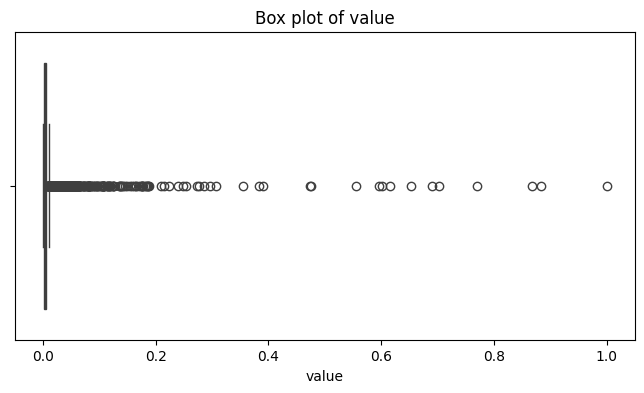

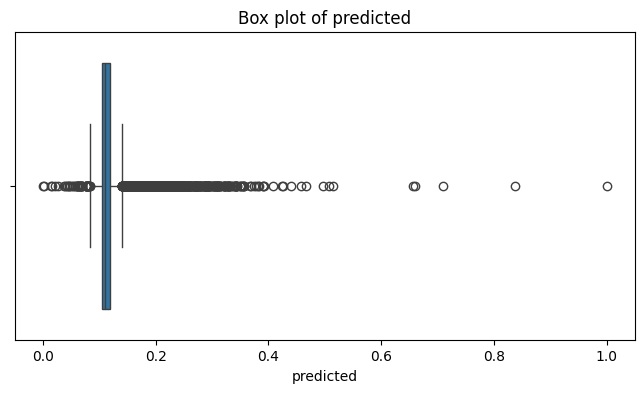

In [31]:
# Plotting box plots for each column
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

## **Applying Log Transformation**

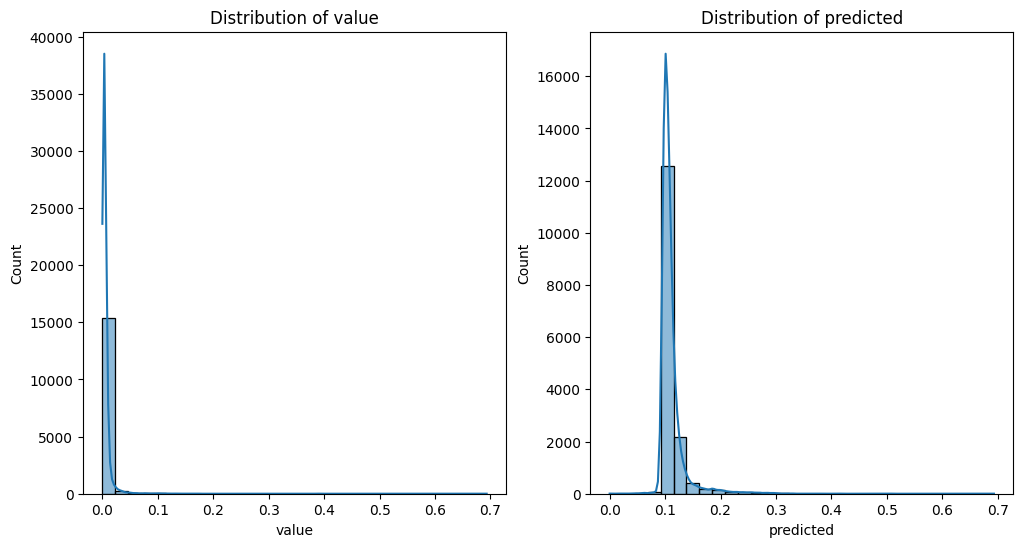

In [32]:
# Applying log transform to 'value' and 'predicted' columns
df['value_log'] = np.log1p(df['value'])
df['predicted_log'] = np.log1p(df['predicted'])


# Droping the original columns
df.drop(['value', 'predicted'], axis=1, inplace=True)
df['value']=df['value_log']
df['predicted']=df['predicted_log']
df.drop(['value_log','predicted_log'],axis=1,inplace=True)

# Ploting the transformed columns to check the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['value'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of value')
sns.histplot(df['predicted'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of predicted')
plt.show()


### **Seperating Target column**

In [33]:
# Separating features and target
X = df.drop('is_anomaly', axis=1)
y = df['is_anomaly']

### **Performing Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split
# Spliting the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **Training The classifiers**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9706253948199621
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2997
           1       0.81      0.59      0.68       169

    accuracy                           0.97      3166
   macro avg       0.89      0.79      0.83      3166
weighted avg       0.97      0.97      0.97      3166



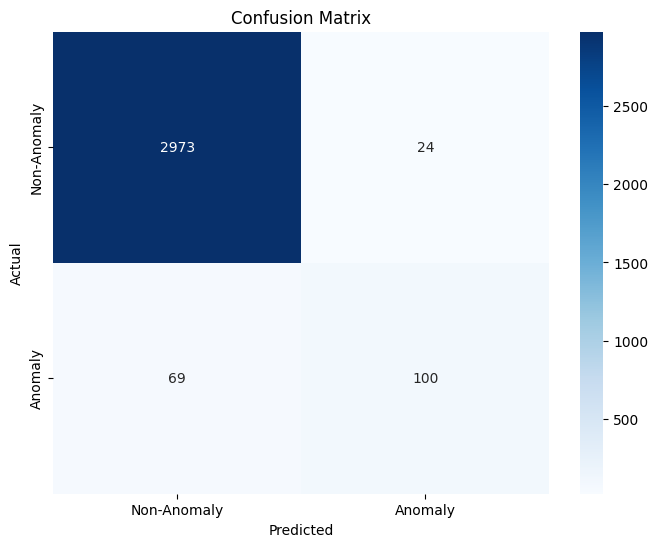

In [36]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Anomaly', 'Anomaly'], yticklabels=['Non-Anomaly', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report,f1_score

# Converting the training and testing data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

# Setting the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Training the model
num_boost_round = 100
bst = xgb.train(params, dtrain, num_boost_round)

# Making predictions
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9728363866077069
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2997
           1       0.81      0.64      0.72       169

    accuracy                           0.97      3166
   macro avg       0.90      0.82      0.85      3166
weighted avg       0.97      0.97      0.97      3166



In [38]:
#printing the f1 score
f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.9728363866077069
F1 Score: 0.7152317880794702


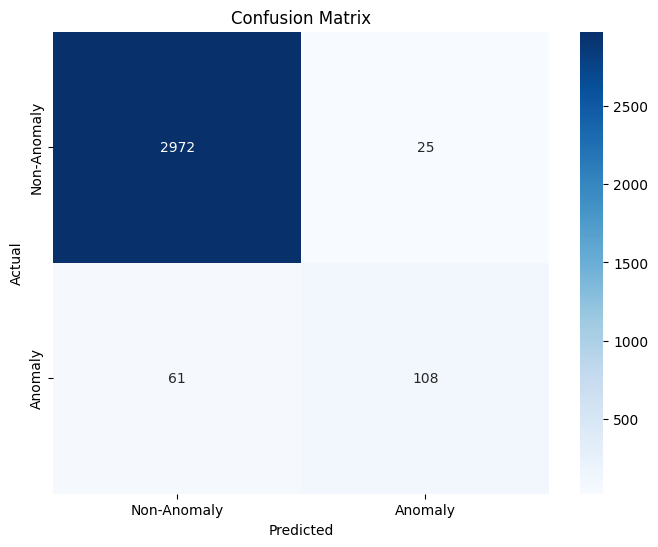

In [39]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Anomaly', 'Anomaly'], yticklabels=['Non-Anomaly', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Hyperparameter tuning using GridSearchCV**

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Defining the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'eta': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# Initializing the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')

# Defining the scoring function
scorer = make_scorer(f1_score)

# Initializing GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, scoring=scorer, cv=3, n_jobs=-1, verbose=1)

# Fitting GridSearchCV to the data
grid_search_xgb.fit(X_train, y_train)

# Getting the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f'Best parameters for XGBoost: {best_params_xgb}')
print(f'Best F1 score for XGBoost: {best_score_xgb}')

# Evaluating on the validation set
y_pred_xgb = grid_search_xgb.predict(X_val)
f1_xgb = f1_score(y_val, y_pred_xgb)

print(f'XGBoost Validation F1 Score: {f1_xgb}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'eta': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best F1 score for XGBoost: 0.7317560437025316
XGBoost Validation F1 Score: 0.7109634551495017


In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [43]:
accuracies = {}
confusion_matrices = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[name] = accuracy
    confusion_matrices[name] = confusion_matrix(y_val, y_pred)

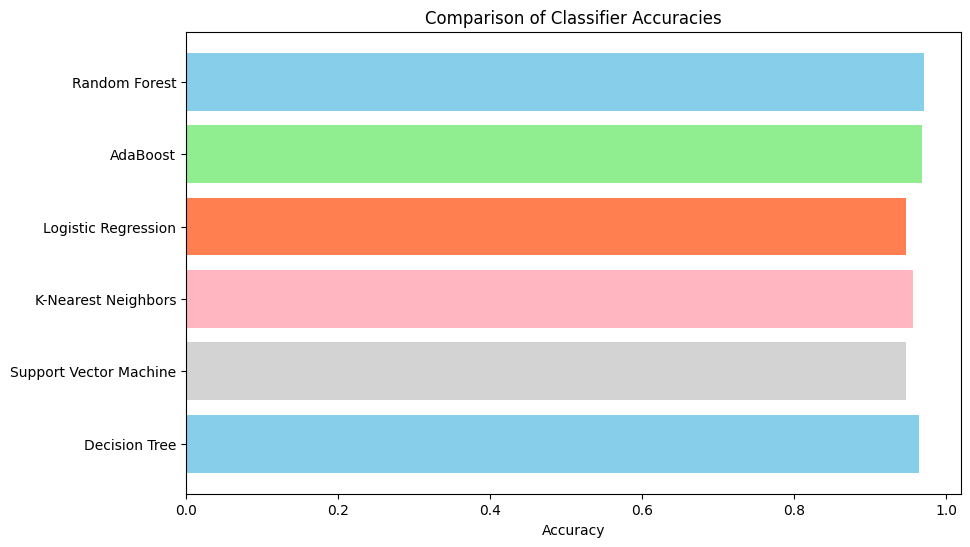

In [44]:
# Defining a list of colors for each bar
colors = ['skyblue', 'lightgreen', 'coral', 'lightpink', 'lightgrey']
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color=colors)
plt.xlabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.gca().invert_yaxis()  # Inverting the y-axis to show the highest accuracy at the top
plt.show()

In [45]:
# Predicting on the test data
test_predictions = model.predict(test)

# Creating a DataFrame with the predictions
test_results = pd.DataFrame({
    'Timestamp': test['timestamp'],
    'is_anomaly': test_predictions
})

test_results.head(50)

,Timestamp,is_anomaly
0,1396332000,0
1,1396332300,0
2,1396332600,0
3,1396332900,0
4,1396333200,0
5,1396333500,0
6,1396333800,0
7,1396334100,0
8,1396334400,0
9,1396334700,0


In [46]:
test_results['is_anomaly'].value_counts()

is_anomaly
0    2265
1    1695
Name: count, dtype: int64